In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Load Dataset
data=pd.read_csv('./Happy_Dataset.csv')
data.head()

,X1,X2,X3,X4,X5,X6,D
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [4]:
#Show Key Statistics
data.describe()

,X1,X2,X3,X4,X5,X6,D
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


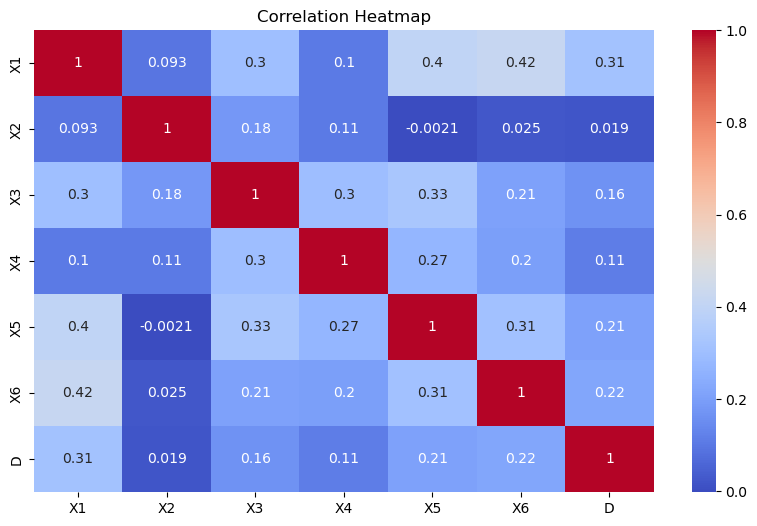

In [5]:
# Generate correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

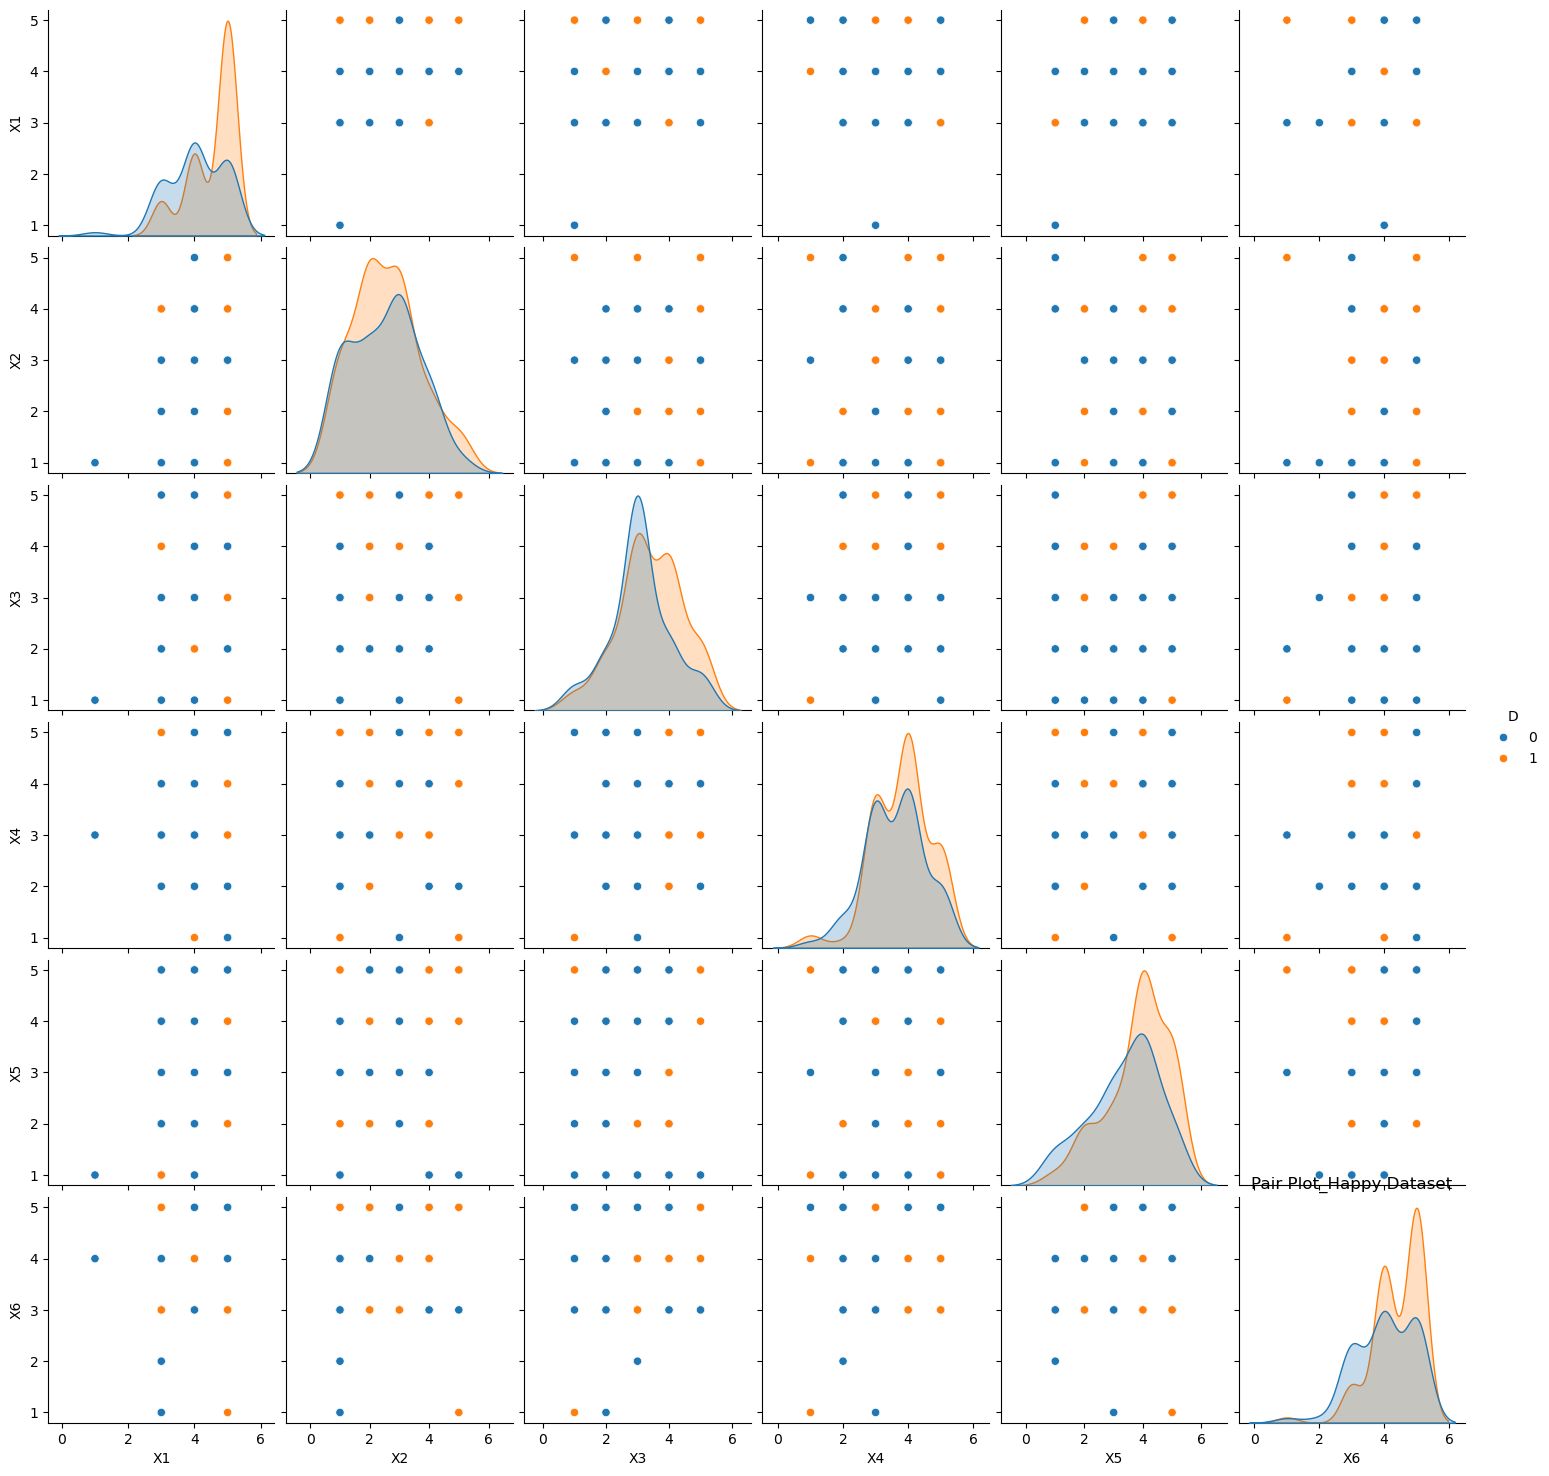

In [10]:
sns.pairplot(data, hue='D')
plt.title('Pair Plot_Happy Dataset')
plt.show()

In [11]:
# Load libraries to perform Naive Bayes, Logistic Regression & Neural Network
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Preprocess Data
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = data['D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [13]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

In [14]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [16]:
# Evaluate the models: Naive Bayes
nb_report = classification_report(y_test, nb_pred)
print("Naive Bayes Report:\n", nb_report)

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49        21
           1       0.52      0.55      0.53        22

    accuracy                           0.51        43
   macro avg       0.51      0.51      0.51        43
weighted avg       0.51      0.51      0.51        43



In [17]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Logistic Regression
lr_report = classification_report(y_test, lr_pred)
print("Logistic Regression Report:\n", lr_report)

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56        21
           1       0.57      0.55      0.56        22

    accuracy                           0.56        43
   macro avg       0.56      0.56      0.56        43
weighted avg       0.56      0.56      0.56        43



In [18]:
# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(6,3), activation='relu', solver='adam', max_iter=10000, random_state=100)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

# Neural Networks
nn_report = classification_report(y_test, nn_pred)
print("Neural Network Report:\n", nn_report)

Neural Network Report:
               precision    recall  f1-score   support

           0       0.56      0.86      0.68        21
           1       0.73      0.36      0.48        22

    accuracy                           0.60        43
   macro avg       0.64      0.61      0.58        43
weighted avg       0.65      0.60      0.58        43



In [19]:
# Confusion Matrix: Naive Bayes
nb_cm = confusion_matrix(y_test, nb_pred)
print("Naive Bayes Confusion Matrix:\n", nb_cm)

Naive Bayes Confusion Matrix:
 [[10 11]
 [10 12]]


In [20]:
# Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
print("Logistic Regression Confusion Matrix:\n", lr_cm)

Logistic Regression Confusion Matrix:
 [[12  9]
 [10 12]]


In [21]:
# Neural Networks
nn_cm = confusion_matrix(y_test, nn_pred)
print("Neural Network Confusion Matrix:\n", nn_cm)

Neural Network Confusion Matrix:
 [[18  3]
 [14  8]]
